Reading the Dataset and understanding the features.

In [2]:
import pandas as pd

# Load the dataset
df_copy = pd.read_csv("CancerData.csv")

# Display the first 5 rows
print(df_copy.head())

   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


Our target feature "diagnosis" is categorical(0/1)

looking for missing values,outliers and feature distributions

In [3]:
print(df_copy.isnull().sum()) #missing values

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


In [4]:
print(df_copy.info())
print(df_copy.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None
               Age       Gender          BMI      Smoking  GeneticRisk  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     50.320000     0.490667    27.513321     0.269333     0.508667   
std      17.640968     0.500080     7.230012     0.443761     0.678895   
min      20.000000     0

<Figure size 1200x600 with 0 Axes>

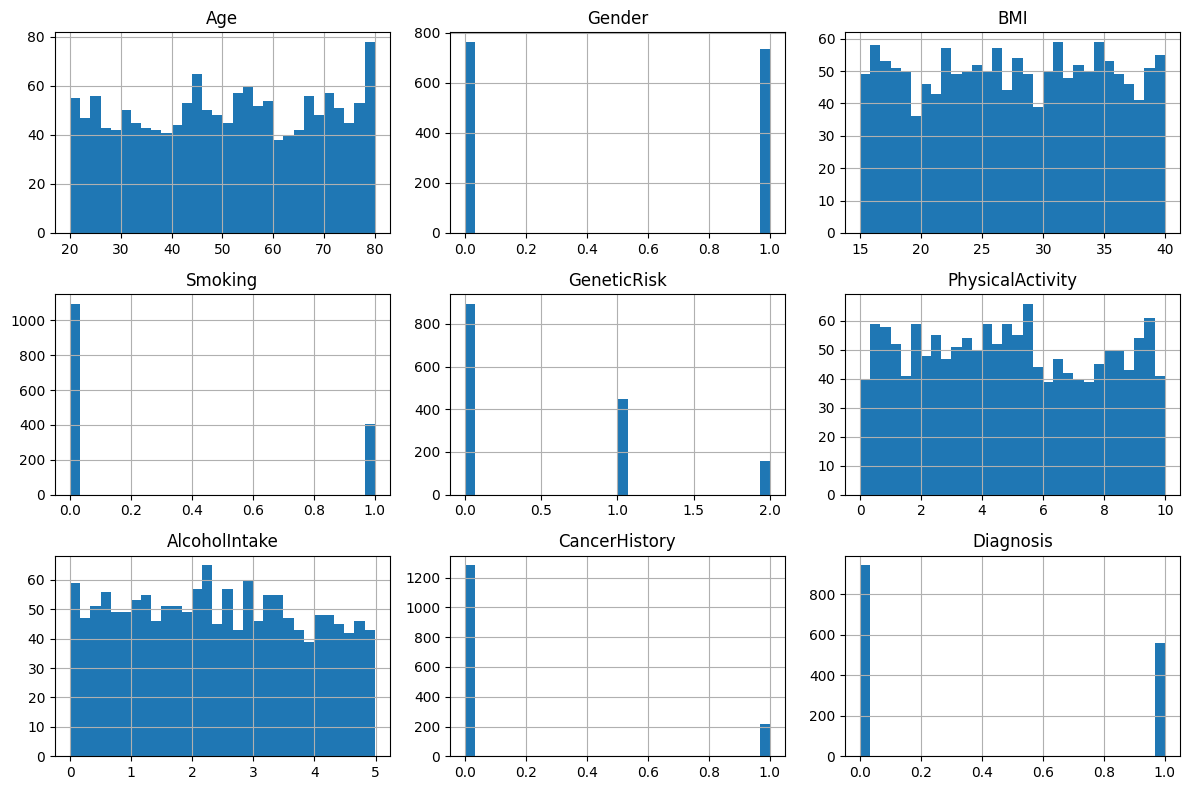

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
df_copy.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()


so from the above feature distribution, we have -> age,bmi,genetic risk,physical activity and alcintake as numeric (non binary data) and rest are categorical (binary) data.

In [6]:
print(df_copy['Diagnosis'].value_counts(normalize=True))

Diagnosis
0    0.628667
1    0.371333
Name: proportion, dtype: float64


checking correlation between the features

heat map!

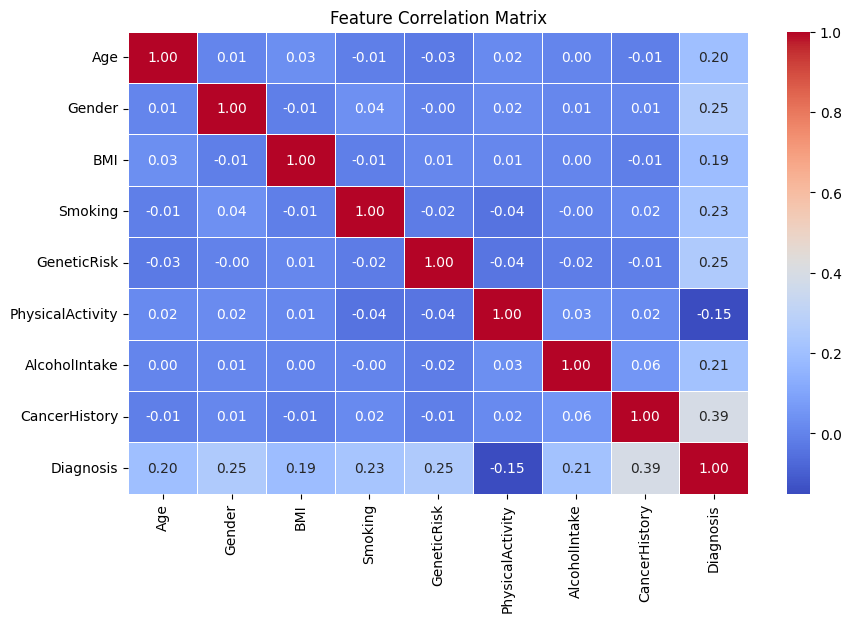

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

here we can draw some correaltions:

Directly correalted features:
CancerHistory (0.39) → The strongest correlation, meaning past cancer history is a strong predictor of diagnosis.
GeneticRisk (0.25) → Genetic risk plays a notable role in cancer diagnosis.
Gender (0.25) → Gender has a moderate correlation, suggesting a possible difference in risk between male and female patients.
Smoking (0.23) → Smoking has a noticeable correlation with cancer diagnosis.
AlcoholIntake (0.21) → Alcohol consumption is also somewhat related.
Age (0.20) → Age is moderately correlated, indicating older individuals may be at higher risk.
BMI (0.19) → BMI has a weaker correlation but still contributes.

Indirectly correlated feature:
PhysicalActivity (-0.15) → Suggests that higher physical activity may slightly reduce the risk of cancer.
(more the activity, less the probabitily of cancer)

CancerHistory, GeneticRisk, and Smoking are the strongest predictors
PhysicalActivity may be a protective factor

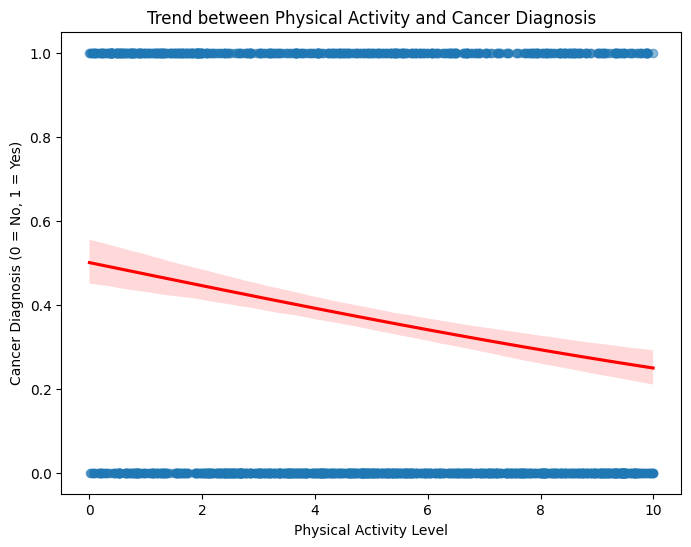

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df_copy['PhysicalActivity'], y=df_copy['Diagnosis'], logistic=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Physical Activity Level")
plt.ylabel("Cancer Diagnosis (0 = No, 1 = Yes)")
plt.title("Trend between Physical Activity and Cancer Diagnosis")

# Show plot
plt.show()


The above graph shows the inverse relation between the physical activity and cancer diagnosis , more the value of physical activity, less the probabitily of cancer diagnosis.

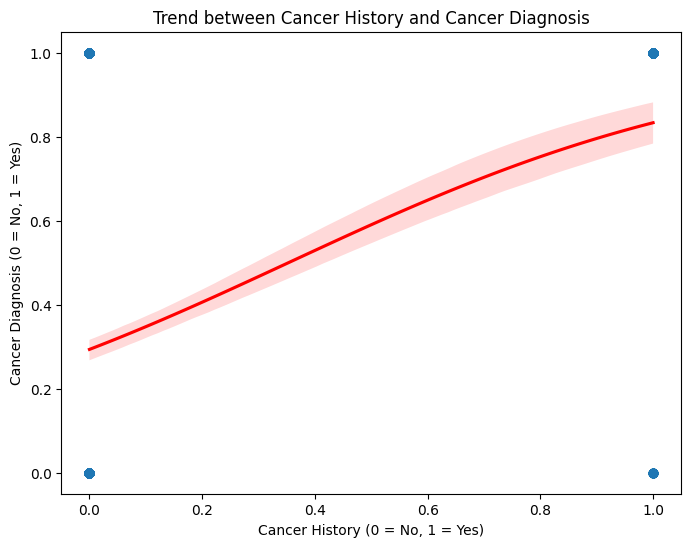

In [13]:
  import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with logistic regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df_copy['CancerHistory'], y=df_copy['Diagnosis'], logistic=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Cancer History (0 = No, 1 = Yes)")
plt.ylabel("Cancer Diagnosis (0 = No, 1 = Yes)")
plt.title("Trend between Cancer History and Cancer Diagnosis")

# Show plot
plt.show()


the above graph show the direct relation between the cancer history and cancer diagnosis.

**Trying out all the models without pre-processsing to see the accuracy.**


🔹 Training SVM...
📌 Accuracy: 0.8933
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       189
           1       0.89      0.81      0.85       111

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.89      0.89       300



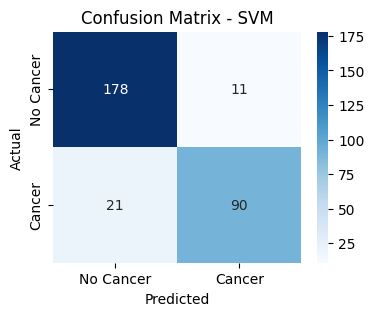


🔹 Training KNN...
📌 Accuracy: 0.9100
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       189
           1       0.92      0.83      0.87       111

    accuracy                           0.91       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.91      0.91       300



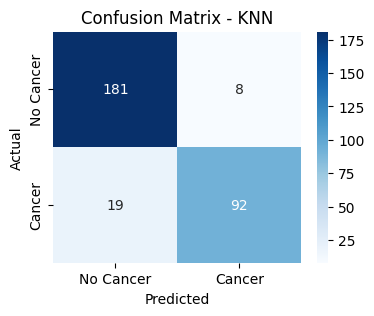


🔹 Training Random Forest...
📌 Accuracy: 0.8933
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       189
           1       0.83      0.89      0.86       111

    accuracy                           0.89       300
   macro avg       0.88      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



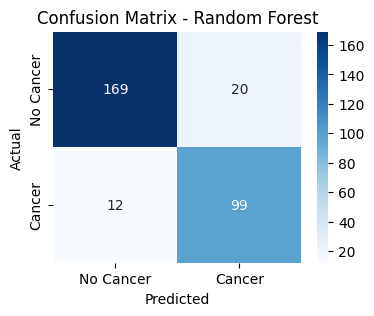


🔹 Training Decision Tree...
📌 Accuracy: 0.8067
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       189
           1       0.69      0.87      0.77       111

    accuracy                           0.81       300
   macro avg       0.80      0.82      0.80       300
weighted avg       0.83      0.81      0.81       300



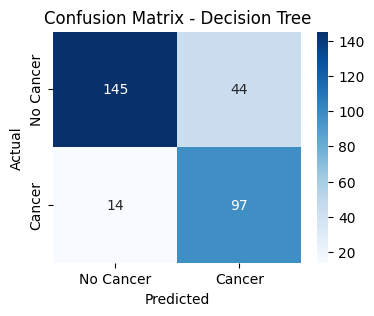


🔹 Training XGBoost...
📌 Accuracy: 0.8700


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:09:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       189
           1       0.80      0.86      0.83       111

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.87      0.87      0.87       300



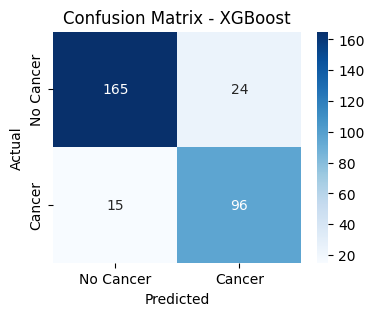

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df_copy = pd.read_csv("CancerData.csv")

# Define features and target variable
X = df_copy.drop(columns=["Diagnosis"])  # Features
y = df_copy["Diagnosis"]  # Target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE (only for Decision Tree, Random Forest, and XGBoost)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardizing for SVM & KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    "SVM": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Use SMOTE data for RF, DT, XGB
    if name in ["Random Forest", "Decision Tree", "XGBoost"]:
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Print results
    print(f"📌 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"📊 Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Without preprocessing we got max-> 91% accuracy with 91 and 96 as preciosn and recall for KNN.


**Trying Out with pre-processing**

In [16]:
# Check for missing values
df = pd.read_csv('CancerData.csv')
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

if missing_values.empty:
    print("No missing values found in the dataset! ✅")
else:
    print("Missing values per column:")
    print(missing_values)


No missing values found in the dataset! ✅


In [17]:
#checkig for outliers
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Dictionary to store outlier counts
outlier_counts = {}

# Loop through numerical columns and calculate outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = outliers.count()

# Display the outlier counts for each column
outlier_counts


{'Age': np.int64(0),
 'Gender': np.int64(0),
 'BMI': np.int64(0),
 'Smoking': np.int64(0),
 'GeneticRisk': np.int64(0),
 'PhysicalActivity': np.int64(0),
 'AlcoholIntake': np.int64(0),
 'CancerHistory': np.int64(216),
 'Diagnosis': np.int64(0)}

In [18]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


we see cancerHistoty have 216 outliers, lets see what exaclty they are.

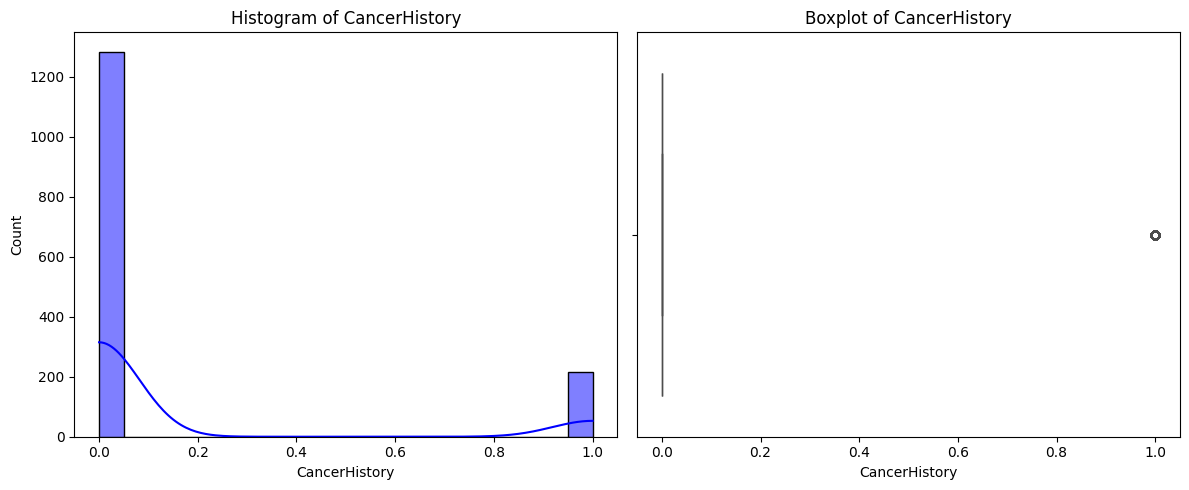

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["CancerHistory"], bins=20, kde=True, color="blue")
plt.title("Histogram of CancerHistory")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["CancerHistory"], color="red")
plt.title("Boxplot of CancerHistory")

plt.tight_layout()
plt.show()


these are not the outliers, but value distribution here is not same,as for 0's we have 1200 values and for 1 we have only around 200-300 values. SO we dont ahve any outliers.

proceeding to a scalar.
as we dont have outliers so we cna use min max scalar.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns (assuming all columns except target 'Diagnosis' are features)
features = df.drop(columns=['Diagnosis'])  # Modify if necessary
target = df['Diagnosis']  # Target column

# Apply MinMaxScaler
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add back the target column
df_scaled['Diagnosis'] = target

# Display first few rows
print(df_scaled.head())


        Age  Gender       BMI  Smoking  GeneticRisk  PhysicalActivity  \
0  0.633333     1.0  0.043473      0.0          0.5          0.815020   
1  0.850000     0.0  0.634195      0.0          0.5          0.936653   
2  0.466667     1.0  0.952978      0.0          1.0          0.513678   
3  0.233333     0.0  0.602603      0.0          0.0          0.950780   
4  0.700000     1.0  0.820543      0.0          0.0          0.535866   

   AlcoholIntake  CancerHistory  Diagnosis  
0       0.831746            1.0          1  
1       0.705684            0.0          0  
2       0.948104            0.0          1  
3       0.409840            0.0          0  
4       0.663598            0.0          1  


Training models with Pre-processed Data.

🔹 Model: KNN (No SMOTE)
✅ Accuracy: 0.8700
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       189
           1       0.79      0.88      0.83       111

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.88      0.87      0.87       300




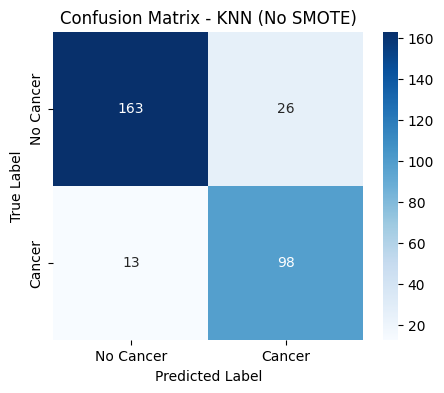

🔹 Model: SVM (No SMOTE)
✅ Accuracy: 0.8733
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       189
           1       0.80      0.88      0.84       111

    accuracy                           0.87       300
   macro avg       0.86      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300




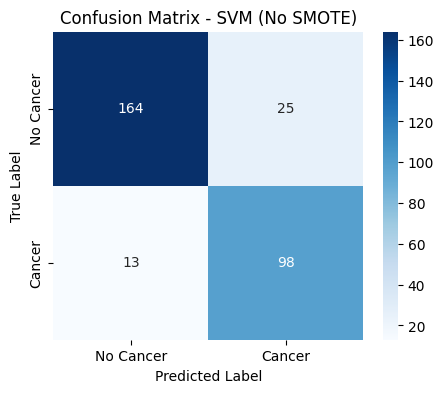

🔹 Model: Random Forest (SMOTE)
✅ Accuracy: 0.9400
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       189
           1       0.93      0.91      0.92       111

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300




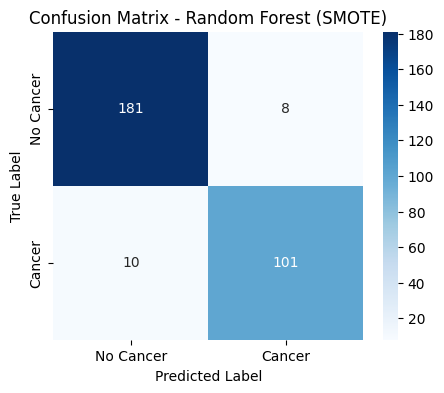

🔹 Model: Decision Tree (SMOTE)
✅ Accuracy: 0.8733
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       189
           1       0.78      0.92      0.84       111

    accuracy                           0.87       300
   macro avg       0.86      0.88      0.87       300
weighted avg       0.88      0.87      0.88       300




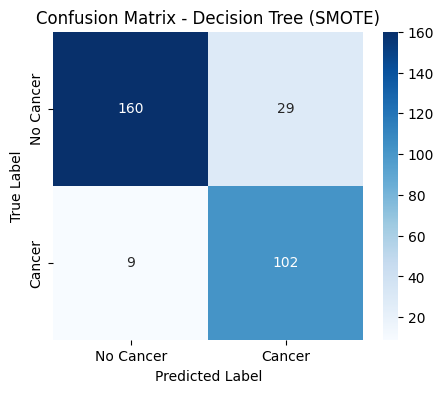

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Model: XGBoost (SMOTE)
✅ Accuracy: 0.9100
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       189
           1       0.86      0.90      0.88       111

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.91      0.91       300




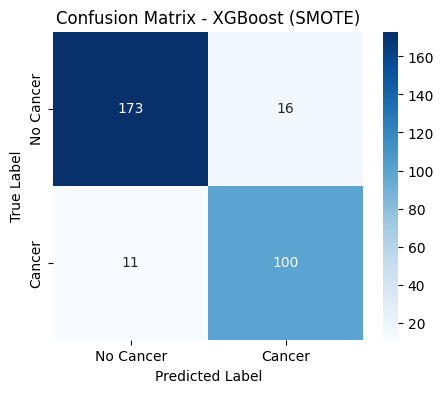

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target
X = df_scaled.drop(columns=['Diagnosis'])
y = df_scaled['Diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to RF, DT, XGBoost
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "KNN (No SMOTE)": KNeighborsClassifier(n_neighbors=5),
    "SVM (No SMOTE)": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest (SMOTE)": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree (SMOTE)": DecisionTreeClassifier(random_state=42),
    "XGBoost (SMOTE)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train, predict, and evaluate
for name, model in models.items():
    if "SMOTE" in name:
        model.fit(X_train_smote, y_train_smote)  # Train with SMOTE data
    else:
        model.fit(X_train, y_train)  # Train without SMOTE

    y_pred = model.predict(X_test)  # Predict on test set

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 Model: {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"📊 Classification Report:\n{classification_report(y_test, y_pred)}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


got 94% accuracy of random forest on proeprocessing.

trying cross-validation
More Reliable Evaluation: Instead of a single train-test split, CV averages the performance across multiple splits.
Reduces Variance: A single split may have lucky or unlucky data distributions. CV ensures the model is tested on different parts of the dataset.
Prevents Overfitting: Helps in detecting if the model is performing well only on specific train-test splits.

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Perform cross-validation
k = 5  # 5-Fold Cross Validation
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=k, scoring='accuracy')
    cv_results[name] = scores.mean()  # Store the mean accuracy
    print(f"{name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

# Print best-performing model
best_model = max(cv_results, key=cv_results.get)
print(f"\n🔥 Best Model: {best_model} with Accuracy = {cv_results[best_model]:.4f}")


Random Forest: Accuracy = 0.9000 ± 0.0227
Decision Tree: Accuracy = 0.8267 ± 0.0400
SVM: Accuracy = 0.8617 ± 0.0193
KNN: Accuracy = 0.8608 ± 0.0186
XGBoost: Accuracy = 0.9017 ± 0.0128

🔥 Best Model: XGBoost with Accuracy = 0.9017


using HyperParameter tuning(random forest):
Improves Model Performance 🚀
Finds the Best Hyperparameters 🔍
Prevents Overfitting or Underfitting 📉

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf_model, rf_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
rf_search.fit(X_train_scaled, y_train)

print(f"Best RF Parameters: {rf_search.best_params_}")
print(f"Best RF Accuracy: {rf_search.best_score_:.4f}")


Best RF Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Best RF Accuracy: 0.9025


In [25]:
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1)
xgb_search.fit(X_train_scaled, y_train)

print(f"Best XGB Parameters: {xgb_search.best_params_}")
print(f"Best XGB Accuracy: {xgb_search.best_score_:.4f}")


Best XGB Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best XGB Accuracy: 0.9142


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:53:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Now you can run GridSearchCV and RandomizedSearchCV without any errors.


svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()
svm_search = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_search.fit(X_train_scaled, y_train)

print(f"Best SVM Parameters: {svm_search.best_params_}")
print(f"Best SVM Accuracy: {svm_search.best_score_:.4f}")


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best SVM Accuracy: 0.8767


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_search = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_search.fit(X_train_scaled, y_train)

print(f"Best KNN Parameters: {knn_search.best_params_}")
print(f"Best KNN Accuracy: {knn_search.best_score_:.4f}")


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Accuracy: 0.8792


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier()
dt_search = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_search.fit(X_train_scaled, y_train)

print(f"Best DT Parameters: {dt_search.best_params_}")
print(f"Best DT Accuracy: {dt_search.best_score_:.4f}")


Best DT Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best DT Accuracy: 0.8700
